In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from PIL import Image

# Reading and data preprocessing

In [2]:
def dataReading(path, lf, file, size=30):
    a = np.zeros((3, size))
    for i in range(1,4):
        fn = '{0}{1}_{2}'.format(lf,str(i),file)
        with open('./{0}/{1}.txt'.format(path, fn), 'r', encoding='utf-8') as f:  
            line = f.readline().strip()
            j = 0
            while line != '':
                a[i-1][j] += float(line)
                line = f.readline().strip()
                j += 1
    return (a[0]+a[1]+a[2])/3

## Learning Rate = 1e-1

### Cross Entropy Loss

In [38]:
CE_testacc = dataReading('data', 'CELoss', 'testacc')
CE_testloss = dataReading('data', 'CELoss', 'testloss')
CE_trainacc = dataReading('data', 'CELoss', 'trainacc')
CE_trainloss = dataReading('data', 'CELoss', 'trainloss')
print(CE_testacc[-1], CE_testloss[-1], CE_trainacc[-1], CE_trainloss[-1])

0.5765333333333333 0.009372239601612091 0.5374933333333334 0.010075979039669036


### L1 Loss

In [39]:
L1_testacc = dataReading('data', 'L1Loss', 'testacc')  
L1_testloss = dataReading('data', 'L1Loss', 'testloss')  
L1_trainacc = dataReading('data', 'L1Loss', 'trainacc')  
L1_trainloss = dataReading('data', 'L1Loss', 'trainloss') 
print(L1_testacc[-1], L1_testloss[-1], L1_trainacc[-1], L1_trainloss[-1])

0.09993333333333333 0.0007921214724580447 0.09913333333333335 0.0007844613721966744


### Focal Loss ($\gamma = 0.5$)

In [40]:
FC05_testacc = dataReading('data', 'FCLoss05', 'testacc')  
FC05_testloss = dataReading('data', 'FCLoss05', 'testloss')  
FC05_trainacc = dataReading('data', 'FCLoss05', 'trainacc')  
FC05_trainloss = dataReading('data', 'FCLoss05', 'trainloss')
print(FC05_testacc[-1], FC05_testloss[-1], FC05_trainacc[-1], FC05_trainloss[-1])

0.5753 0.008239551518360774 0.5402666666666667 0.008794694869915643


### Focal Loss ($\gamma = 0.5$)

In [41]:
FC20_testacc = dataReading('data', 'FCLoss20', 'testacc')  
FC20_testloss = dataReading('data', 'FCLoss20', 'testloss')  
FC20_trainacc = dataReading('data', 'FCLoss20', 'trainacc')  
FC20_trainloss = dataReading('data', 'FCLoss20', 'trainloss')
print(FC20_testacc[-1], FC20_testloss[-1], FC20_trainacc[-1], FC20_trainloss[-1])

0.5429666666666667 0.006412729833523432 0.5098400000000001 0.006823979185819625


## Analysis with Plot

In [7]:
def drawAx(ax, data1, label1, data2, label2, title):
    epoch = data1.shape[0]
    ax.set_title(title)  
    ax.plot(range(1,epoch+1), data1, label=label1)
    ax.plot(range(1,epoch+1), data2,label=label2)
    ax.legend(loc='upper left')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    # 获取每条折线的最后一个点的坐标  
    last_test_point = ax.lines[-1].get_xdata().max()  
    last_train_point = ax.lines[-2].get_xdata().max()  
    # 在图上添加注释，显示每个折线最后一个点的坐标   
    ax.annotate(f'({round(last_test_point, 4)}, {round(data1[-1], 4)})', 
    (last_test_point, data1[-1]), textcoords="offset points", xytext=(0, 10), ha='right')  
    ax.annotate(f'({round(last_train_point, 4)}, {round(data2[-1], 4)})', 
    (last_train_point, data2[-1]), textcoords="offset points", xytext=(0, -10), ha='right')
    return ax

In [8]:
def drawThree(ax, data1, label1, data2, label2, data3, label3, title):
    epoch = data1.shape[0]
    ax.plot(range(1,epoch+1), data1, label=label1, color='blue')  
    ax.plot(range(1,epoch+1), data2, label=label2, color='orange')    
    ax.plot(range(1,epoch+1), data3, label=label3, color='green') 
    ax.legend() 
    ax.set_xlabel('Epoch')  # 设置x轴名称  
    ax.set_ylabel('Accuracy')  # 设置y轴名称  
    ax.set_title(title)  # 设置标题  
    # 显示每条折线最后一个点的坐标  
    for line in ax.lines:  
        last_point = line.get_xdata().max()  
        y_value = line.get_ydata().max()  
        ax.annotate(f'({round(last_point, 4)}, {round(y_value, 4)})', 
    (last_point, y_value), textcoords="offset points", xytext=(0, 10), ha='right')
    
    return ax

### Result when learning rate=1e-1

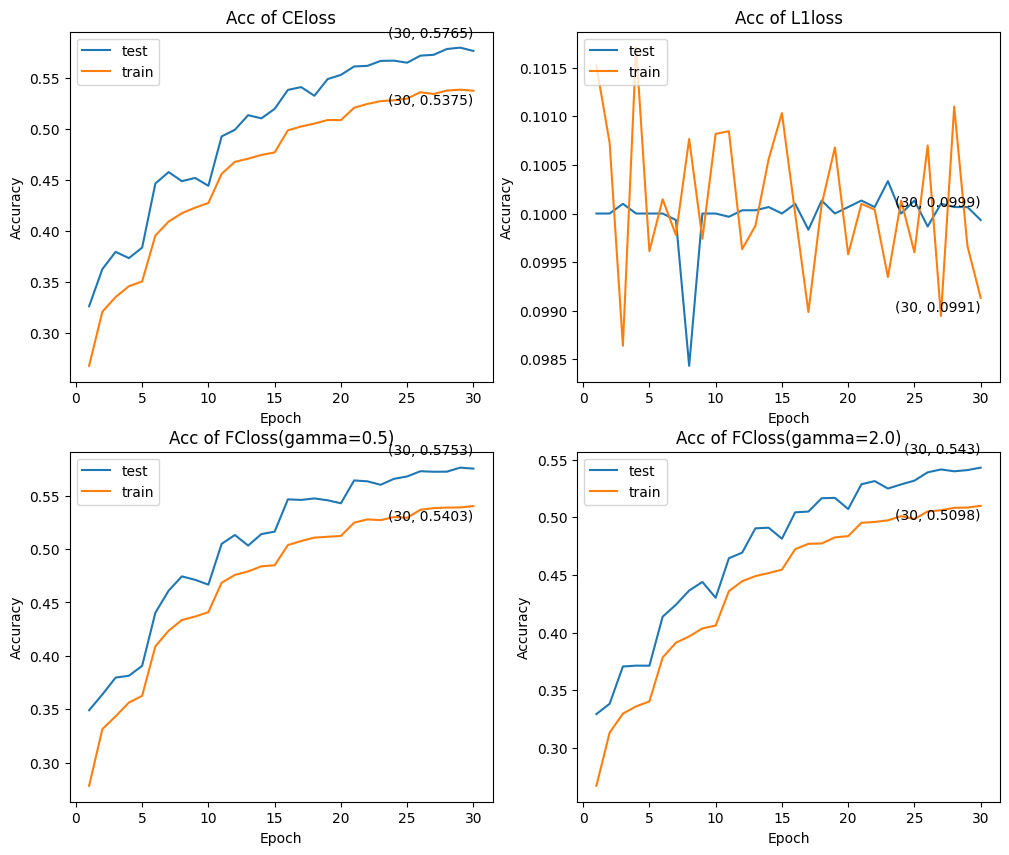

In [9]:
fig, ax = plt.subplots(2, 2)
ax[0][0] = drawAx(ax[0][0], CE_testacc, 'test', CE_trainacc, 'train', 'Acc of CEloss')
ax[0][1] = drawAx(ax[0][1], L1_testacc, 'test', L1_trainacc, 'train', 'Acc of L1loss')
ax[1][0] = drawAx(ax[1][0], FC05_testacc, 'test', FC05_trainacc, 'train', 'Acc of FCloss(gamma=0.5)')
ax[1][1] = drawAx(ax[1][1], FC20_testacc, 'test', FC20_trainacc, 'train', 'Acc of FCloss(gamma=2.0)')
fig.set_size_inches(12, 10)
plt.show()
# 将图片保存为BytesIO对象  
byte_io = io.BytesIO()  
fig.savefig(byte_io, format='png')  # 可以更改format为jpg、bmp等其他格式  
byte_io.seek(0)  
  
# 使用PIL库打开并保存图片到本地文件系统  
image = Image.open(byte_io)  
image.save('./pictures/AccOf4_1e-1.png')  # 替换为你要保存的路径和文件名

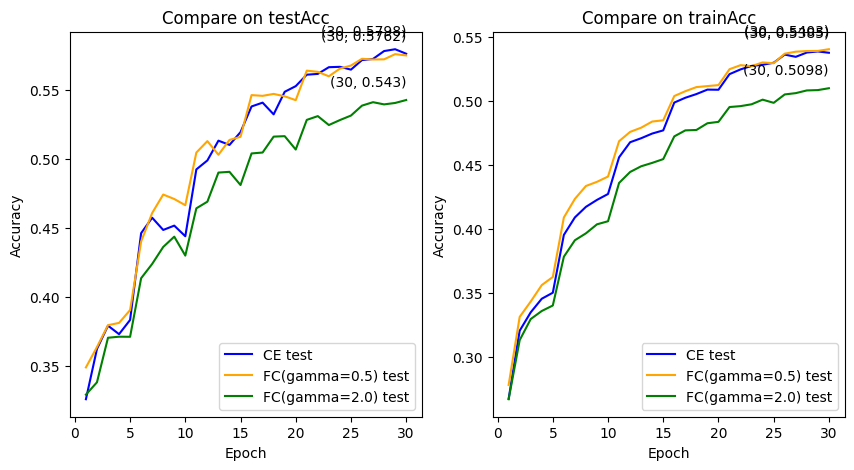

In [10]:
fig, ax = plt.subplots(1, 2)

ax[0] = drawThree(ax[0], CE_testacc, 'CE test', FC05_testacc, 'FC(gamma=0.5) test', FC20_testacc, 'FC(gamma=2.0) test', 'Compare on testAcc')
ax[1] = drawThree(ax[1], CE_trainacc, 'CE test', FC05_trainacc, 'FC(gamma=0.5) test', FC20_trainacc, 'FC(gamma=2.0) test', 'Compare on trainAcc')
  
fig.set_size_inches(10, 5)
plt.show()
# 将图片保存为BytesIO对象  
byte_io = io.BytesIO()  
fig.savefig(byte_io, format='png')  # 可以更改format为jpg、bmp等其他格式  
byte_io.seek(0)  
  
# 使用PIL库打开并保存图片到本地文件系统  
image = Image.open(byte_io)  
image.save('./pictures/CompareOf3_1e-1.png')  # 替换为你要保存的路径和文件名

From the last plots, we can see that L1 loss doesn't work well on this model, Cross-Entropy loss and Focal loss are similar, but $\gamma=0.5$ works better than $\gamma=2.0$. 

## Learning Rate = 1e-2

### Cross Entropy loss

In [11]:
e2CE_testacc = dataReading('dataForE2', 'e2CE', 'testacc')  
e2CE_testloss = dataReading('dataForE2', 'e2CE', 'testloss')  
e2CE_trainacc = dataReading('dataForE2', 'e2CE', 'trainacc')  
e2CE_trainloss = dataReading('dataForE2', 'e2CE', 'trainloss')  

### L1 Loss

In [12]:
e2L1_testacc = dataReading('dataForE2', 'e2L1', 'testacc')  
e2L1_testloss = dataReading('dataForE2', 'e2L1', 'testloss')  
e2L1_trainacc = dataReading('dataForE2', 'e2L1', 'trainacc')  
e2L1_trainloss = dataReading('dataForE2', 'e2L1', 'trainloss') 

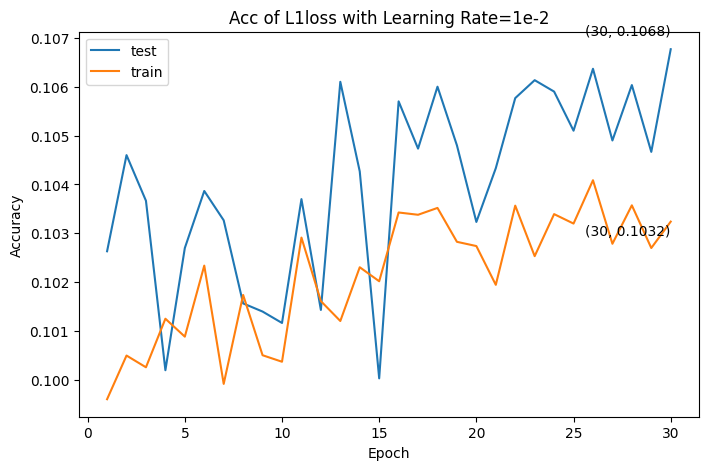

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = drawAx(ax, e2L1_testacc, 'test', e2L1_trainacc, 'train', 'Acc of L1loss with Learning Rate=1e-2')
  
fig.set_size_inches(8, 5)
plt.show()
# 将图片保存为BytesIO对象  
byte_io = io.BytesIO()  
fig.savefig(byte_io, format='png')  # 可以更改format为jpg、bmp等其他格式  
byte_io.seek(0)  
  
# 使用PIL库打开并保存图片到本地文件系统  
image = Image.open(byte_io)  
image.save('./pictures/AccOfL1_1e-2.png')  # 替换为你要保存的路径和文件名

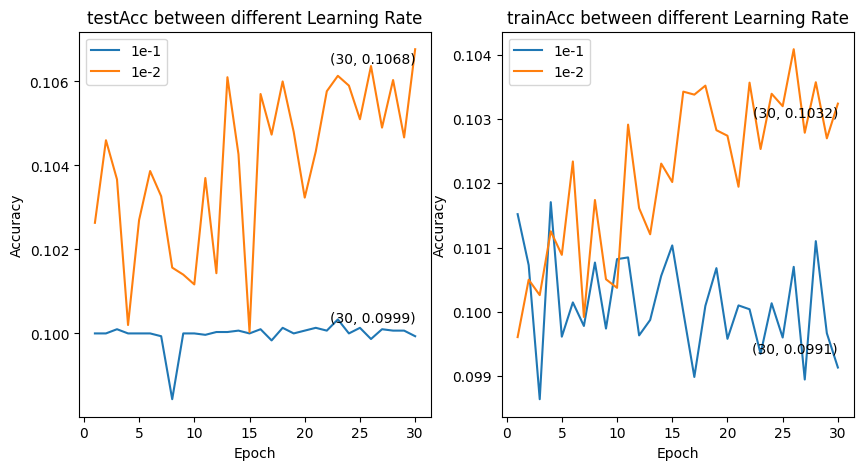

In [14]:
fig, ax = plt.subplots(1, 2)
ax[0] = drawAx(ax[0], L1_testacc, '1e-1', e2L1_testacc, '1e-2', 'testAcc between different Learning Rate')
ax[1] = drawAx(ax[1], L1_trainacc, '1e-1', e2L1_trainacc, '1e-2', 'trainAcc between different Learning Rate')
  
fig.set_size_inches(10, 5)
plt.show()

# 将图片保存为BytesIO对象  
byte_io = io.BytesIO()  
fig.savefig(byte_io, format='png')  # 可以更改format为jpg、bmp等其他格式  
byte_io.seek(0)  
  
# 使用PIL库打开并保存图片到本地文件系统  
image = Image.open(byte_io)  
image.save('./pictures/CompareOfL1_LR.png')  # 替换为你要保存的路径和文件名

From the three figures about L1 loss function under different learning rates, we can see that, although lower the learning rate can increase the accuracy of L1 function, but it's still insignificant. So to save time and arithmetic power, the following analysis will give up the L1 function.

### Focal Loss ($\gamma = 0.5$)

In [15]:
e2FC05_testacc = dataReading('dataForE2', 'e2FC05', 'testacc')    
e2FC05_testloss = dataReading('dataForE2', 'e2FC05', 'testloss')    
e2FC05_trainacc = dataReading('dataForE2', 'e2FC05', 'trainacc')    
e2FC05_trainloss = dataReading('dataForE2', 'e2FC05', 'trainloss') 

### Focal Loss ($\gamma = 2.0$)

In [16]:
e2FC20_testacc = dataReading('dataForE2', 'e2FC20', 'testacc')    
e2FC20_testloss = dataReading('dataForE2', 'e2FC20', 'testloss')    
e2FC20_trainacc = dataReading('dataForE2', 'e2FC20', 'trainacc')    
e2FC20_trainloss = dataReading('dataForE2', 'e2FC20', 'trainloss') 

## Learning Rate = 1e-3

### Cross Entropy loss

In [17]:
e3CE_testacc = dataReading('dataForE3', 'e3CE', 'testacc')  
e3CE_testloss = dataReading('dataForE3', 'e3CE', 'testloss')  
e3CE_trainacc = dataReading('dataForE3', 'e3CE', 'trainacc')  
e3CE_trainloss = dataReading('dataForE3', 'e3CE', 'trainloss') 

### Focal Loss ($\gamma = 0.5$)

In [18]:
e3FC05_testacc = dataReading('dataForE3', 'e3FC05', 'testacc')    
e3FC05_testloss = dataReading('dataForE3', 'e3FC05', 'testloss')    
e3FC05_trainacc = dataReading('dataForE3', 'e3FC05', 'trainacc')    
e3FC05_trainloss = dataReading('dataForE3', 'e3FC05', 'trainloss') 

### Focal Loss ($\gamma = 2.0$)

In [19]:
e3FC20_testacc = dataReading('dataForE3', 'e3FC20', 'testacc')    
e3FC20_testloss = dataReading('dataForE3', 'e3FC20', 'testloss')    
e3FC20_trainacc = dataReading('dataForE3', 'e3FC20', 'trainacc')    
e3FC20_trainloss = dataReading('dataForE3', 'e3FC20', 'trainloss') 

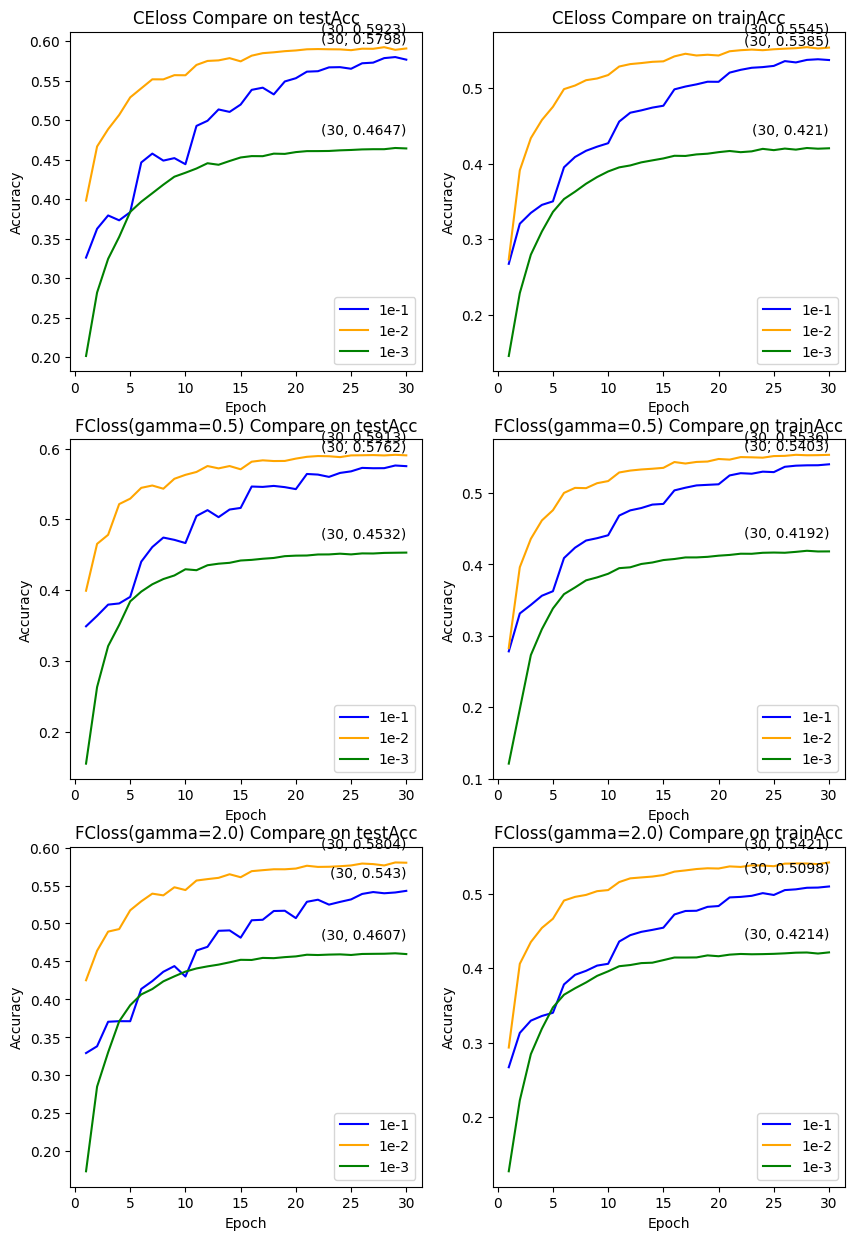

In [20]:
fig, ax = plt.subplots(3,2)
ax[0][0] = drawThree(ax[0][0], CE_testacc, '1e-1', e2CE_testacc, '1e-2', e3CE_testacc, '1e-3', 'CEloss Compare on testAcc')
ax[0][1] = drawThree(ax[0][1], CE_trainacc, '1e-1', e2CE_trainacc, '1e-2', e3CE_trainacc, '1e-3', 'CEloss Compare on trainAcc')
ax[1][0] = drawThree(ax[1][0], FC05_testacc, '1e-1', e2FC05_testacc, '1e-2', e3FC05_testacc, '1e-3', 'FCloss(gamma=0.5) Compare on testAcc')
ax[1][1] = drawThree(ax[1][1], FC05_trainacc, '1e-1', e2FC05_trainacc, '1e-2', e3FC05_trainacc, '1e-3', 'FCloss(gamma=0.5) Compare on trainAcc')
ax[2][0] = drawThree(ax[2][0], FC20_testacc, '1e-1', e2FC20_testacc, '1e-2', e3FC20_testacc, '1e-3', 'FCloss(gamma=2.0) Compare on testAcc')
ax[2][1] = drawThree(ax[2][1], FC20_trainacc, '1e-1', e2FC20_trainacc, '1e-2', e3FC20_trainacc, '1e-3', 'FCloss(gamma=2.0) Compare on trainAcc')

fig.set_size_inches(10, 15)
plt.show()

# 将图片保存为BytesIO对象  
byte_io = io.BytesIO()  
fig.savefig(byte_io, format='png')  # 可以更改format为jpg、bmp等其他格式  
byte_io.seek(0)  
  
# 使用PIL库打开并保存图片到本地文件系统  
image = Image.open(byte_io)  
image.save('./pictures/CompareOf3_LR.png')  # 替换为你要保存的路径和文件名

From the plots , we can see, when learning rate = 1e-2, every loss function get a higher accuracy, and the data curves also become smoother.  
But when learning rate = 1e-3, the accuracy of each loss function become even lower than learning rate = 1e-1, although the data curves become smoother, too.   

So, we can get a preliminary conclusion: when the other hyperparameters keep still, the lower the learning rate will be, the smoother the data curve will be, but the accuracy will not be better.  

However, it didn't make us satisfy. The accuracy should be higher when the learning rate was lower. Thus, I will continue test on other hyperparameters. 
   
Through learning, I choose epoch as the variable.

## Epoch = 60,  Learning rate=1e-3

In [21]:
def dataReadingOne(path, lf, file):
    a = []
    fn = '{0}_{1}'.format(lf,file)
    with open('./{0}/{1}.txt'.format(path, fn), 'r', encoding='utf-8') as f:  
        line = f.readline().strip()
        while line != '':
            a.append(float(line))
            line = f.readline().strip()
    return np.array(a)

### Cross Entropy loss

In [22]:
epo60CE_testacc = dataReadingOne('dataForEpo', 'epo60CE1', 'testacc')  
epo60CE_testloss = dataReadingOne('dataForEpo', 'epo60CE1', 'testloss')  
epo60CE_trainacc = dataReadingOne('dataForEpo', 'epo60CE1', 'trainacc')  
epo60CE_trainloss = dataReadingOne('dataForEpo', 'epo60CE1', 'trainloss') 

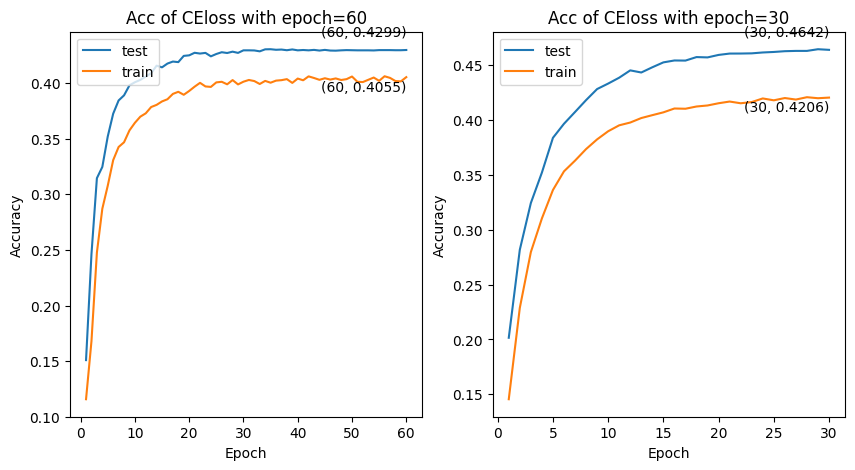

In [23]:
fig, ax = plt.subplots(1, 2)
ax[0] = drawAx(ax[0], epo60CE_testacc, 'test', epo60CE_trainacc, 'train', 'Acc of CEloss with epoch=60')
ax[1] = drawAx(ax[1], e3CE_testacc, 'test', e3CE_trainacc, 'train', 'Acc of CEloss with epoch=30')
  
fig.set_size_inches(10, 5)
plt.show()

# 将图片保存为BytesIO对象  
byte_io = io.BytesIO()  
fig.savefig(byte_io, format='png')  # 可以更改format为jpg、bmp等其他格式  
byte_io.seek(0)  
  
# 使用PIL库打开并保存图片到本地文件系统  
image = Image.open(byte_io)  
image.save('./pictures/compareOfCE_epo60.png')  # 替换为你要保存的路径和文件名

It's clear to see that when epoch=60, the accuracy of CE loss function even goes worse than when wpoch=30! 

### Focal Loss ($\gamma = 0.5$)

In [24]:
epo60FC05_testacc = dataReadingOne('dataForEpo', 'epo60FC051', 'testacc')    
epo60FC05_testloss = dataReadingOne('dataForEpo', 'epo60FC051', 'testloss')    
epo60FC05_trainacc = dataReadingOne('dataForEpo', 'epo60FC051', 'trainacc')    
epo60FC05_trainloss = dataReadingOne('dataForEpo', 'epo60FC051', 'trainloss') 

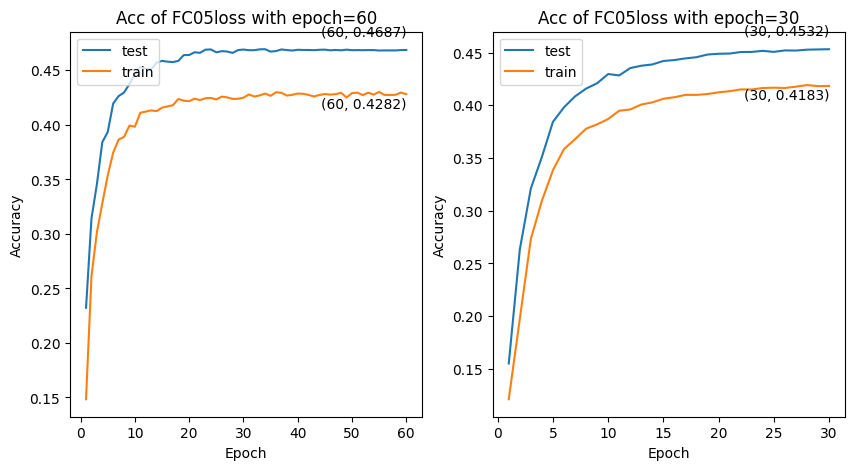

In [25]:
fig, ax = plt.subplots(1, 2)
ax[0] = drawAx(ax[0], epo60FC05_testacc, 'test', epo60FC05_trainacc, 'train', 'Acc of FC05loss with epoch=60')
ax[1] = drawAx(ax[1], e3FC05_testacc, 'test', e3FC05_trainacc, 'train', 'Acc of FC05loss with epoch=30')
  
fig.set_size_inches(10, 5)
plt.show()

# 将图片保存为BytesIO对象  
byte_io = io.BytesIO()  
fig.savefig(byte_io, format='png')  # 可以更改format为jpg、bmp等其他格式  
byte_io.seek(0)  
  
# 使用PIL库打开并保存图片到本地文件系统  
image = Image.open(byte_io)  
image.save('./pictures/CompareOfFC05_epo60.png')  # 替换为你要保存的路径和文件名

### Focal Loss ($\gamma = 2.0$)

In [26]:
epo60FC20_testacc = dataReadingOne('dataForEpo', 'epo60FC201', 'testacc')    
epo60FC20_testloss = dataReadingOne('dataForEpo', 'epo60FC201', 'testloss')    
epo60FC20_trainacc = dataReadingOne('dataForEpo', 'epo60FC201', 'trainacc')    
epo60FC20_trainloss = dataReadingOne('dataForEpo', 'epo60FC201', 'trainloss') 

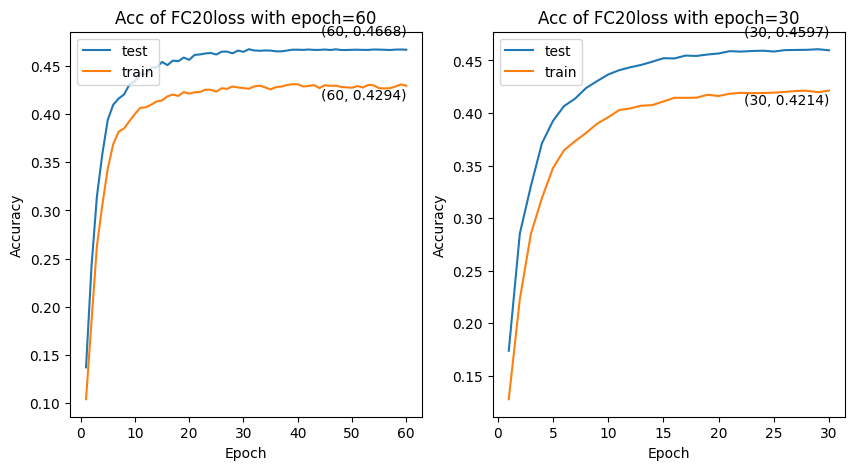

In [27]:
fig, ax = plt.subplots(1, 2)
ax[0] = drawAx(ax[0], epo60FC20_testacc, 'test', epo60FC20_trainacc, 'train', 'Acc of FC20loss with epoch=60')
ax[1] = drawAx(ax[1], e3FC20_testacc, 'test', e3FC20_trainacc, 'train', 'Acc of FC20loss with epoch=30')
  
fig.set_size_inches(10, 5)
plt.show()

# 将图片保存为BytesIO对象  
byte_io = io.BytesIO()  
fig.savefig(byte_io, format='png')  # 可以更改format为jpg、bmp等其他格式  
byte_io.seek(0)  
  
# 使用PIL库打开并保存图片到本地文件系统  
image = Image.open(byte_io)  
image.save('./pictures/CompareOfFC20_epo60.png')  # 替换为你要保存的路径和文件名

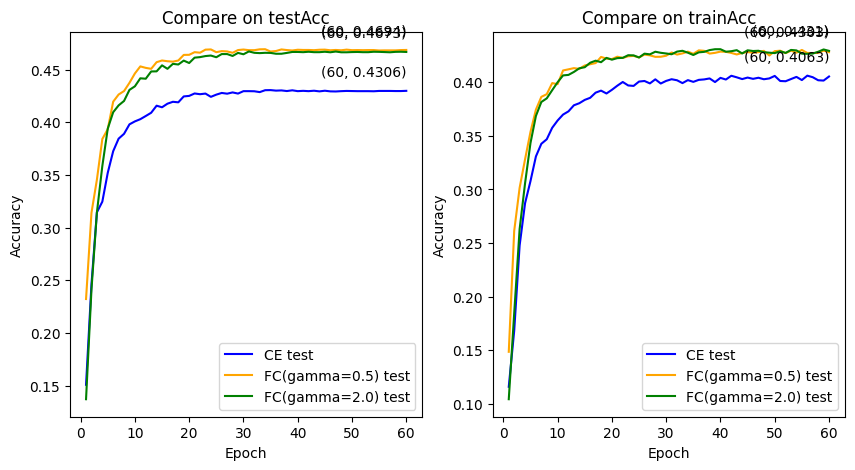

In [28]:
fig, ax = plt.subplots(1, 2)

ax[0] = drawThree(ax[0], epo60CE_testacc, 'CE test', epo60FC05_testacc, 'FC(gamma=0.5) test',
                  epo60FC20_testacc, 'FC(gamma=2.0) test', 'Compare on testAcc')
ax[1] = drawThree(ax[1], epo60CE_trainacc, 'CE test', epo60FC05_trainacc, 'FC(gamma=0.5) test',
                  epo60FC20_trainacc, 'FC(gamma=2.0) test', 'Compare on trainAcc')
  
fig.set_size_inches(10, 5)
plt.show()

# 将图片保存为BytesIO对象  
byte_io = io.BytesIO()  
fig.savefig(byte_io, format='png')  # 可以更改format为jpg、bmp等其他格式  
byte_io.seek(0)  
  
# 使用PIL库打开并保存图片到本地文件系统  
image = Image.open(byte_io)  
image.save('./pictures/CompareOf3_epo60.png')  # 替换为你要保存的路径和文件名

## Epoch = 100,  Learning rate=1e-3

### Cross Entropy loss

In [29]:
epo100CE_testacc = dataReadingOne('dataForEpo', 'epo100CE1', 'testacc')  
epo100CE_testloss = dataReadingOne('dataForEpo', 'epo100CE1', 'testloss')  
epo100CE_trainacc = dataReadingOne('dataForEpo', 'epo100CE1', 'trainacc')  
epo100CE_trainloss = dataReadingOne('dataForEpo', 'epo100CE1', 'trainloss') 

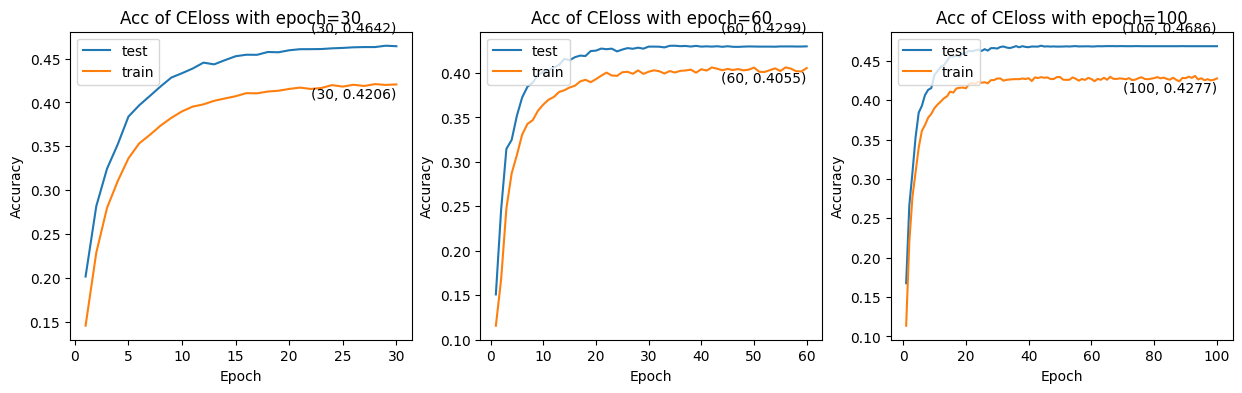

In [37]:
fig, ax = plt.subplots(1, 3)
ax[0] = drawAx(ax[0], e3CE_testacc, 'test', e3CE_trainacc, 'train', 'Acc of CEloss with epoch=30')
ax[1] = drawAx(ax[1], epo60CE_testacc, 'test', epo60CE_trainacc, 'train', 'Acc of CEloss with epoch=60')
ax[2] = drawAx(ax[2], epo100CE_testacc, 'test', epo100CE_trainacc, 'train', 'Acc of CEloss with epoch=100')
  
fig.set_size_inches(15, 4)
plt.show()
# 将图片保存为BytesIO对象  
byte_io = io.BytesIO()  
fig.savefig(byte_io, format='png')  # 可以更改format为jpg、bmp等其他格式  
byte_io.seek(0)  
  
# 使用PIL库打开并保存图片到本地文件系统  
image = Image.open(byte_io)  
image.save('./pictures/CompareOfCE_epo100.png')  # 替换为你要保存的路径和文件名

It's clear to see that when epoch=60, the accuracy of CE loss function even goes worse than when wpoch=30! 

### Focal Loss ($\gamma = 0.5$)

In [31]:
epo100FC05_testacc = dataReadingOne('dataForEpo', 'epo100FC051', 'testacc')    
epo100FC05_testloss = dataReadingOne('dataForEpo', 'epo100FC051', 'testloss')    
epo100FC05_trainacc = dataReadingOne('dataForEpo', 'epo100FC051', 'trainacc')    
epo100FC05_trainloss = dataReadingOne('dataForEpo', 'epo100FC051', 'trainloss') 

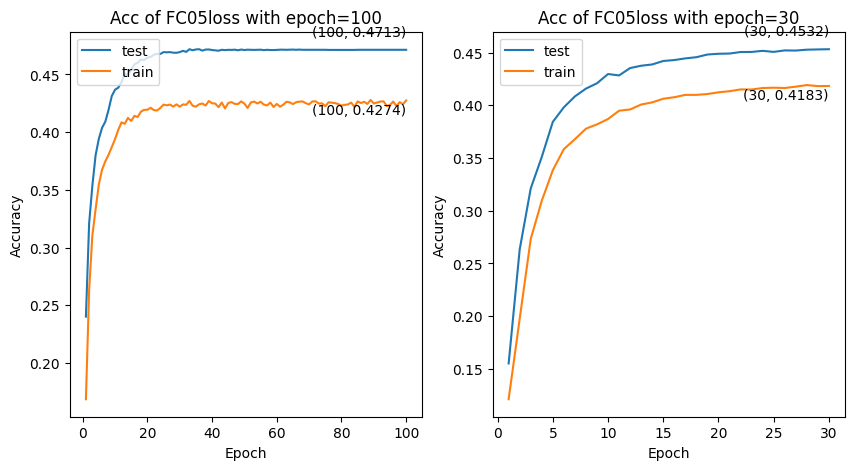

In [32]:
fig, ax = plt.subplots(1, 3)
ax[0] = drawAx(ax[0], e3FC05_testacc, 'test', e3FC05_trainacc, 'train', 'Acc of FC05loss with epoch=30')
ax[1] = drawAx(ax[1], epo60FC05_testacc, 'test', epo60FC05_trainacc, 'train', 'Acc of FC05loss with epoch=60')
ax[2] = drawAx(ax[2], epo100FC05_testacc, 'test', epo100FC05_trainacc, 'train', 'Acc of FC05loss with epoch=100')

  
fig.set_size_inches(10, 5)
plt.show()

# 将图片保存为BytesIO对象  
byte_io = io.BytesIO()  
fig.savefig(byte_io, format='png')  # 可以更改format为jpg、bmp等其他格式  
byte_io.seek(0)  
  
# 使用PIL库打开并保存图片到本地文件系统  
image = Image.open(byte_io)  
image.save('./pictures/CompareOfFC05_epo100.png')  # 替换为你要保存的路径和文件名

### Focal Loss ($\gamma = 2.0$)

In [33]:
epo100FC20_testacc = dataReadingOne('dataForEpo', 'epo100FC201', 'testacc')    
epo100FC20_testloss = dataReadingOne('dataForEpo', 'epo100FC201', 'testloss')    
epo100FC20_trainacc = dataReadingOne('dataForEpo', 'epo100FC201', 'trainacc')    
epo100FC20_trainloss = dataReadingOne('dataForEpo', 'epo100FC201', 'trainloss') 

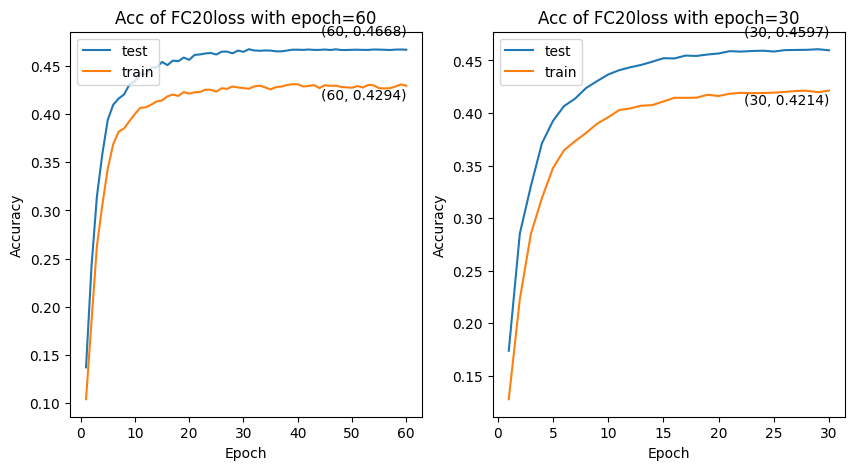

In [34]:
fig, ax = plt.subplots(1, 2)
ax[0] = drawAx(ax[0], epo60FC20_testacc, 'test', epo60FC20_trainacc, 'train', 'Acc of FC20loss with epoch=60')
ax[1] = drawAx(ax[1], e3FC20_testacc, 'test', e3FC20_trainacc, 'train', 'Acc of FC20loss with epoch=30')
  
fig.set_size_inches(10, 5)
plt.show()

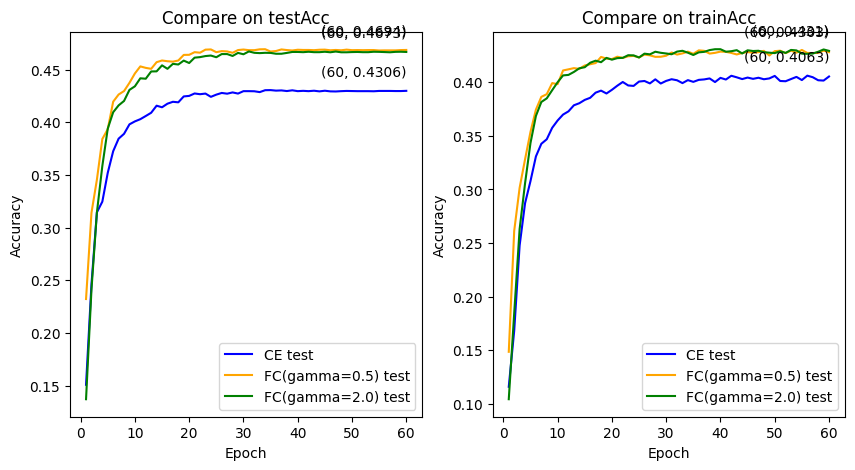

In [35]:
fig, ax = plt.subplots(1, 2)

ax[0] = drawThree(ax[0], epo60CE_testacc, 'CE test', epo60FC05_testacc, 'FC(gamma=0.5) test',
                  epo60FC20_testacc, 'FC(gamma=2.0) test', 'Compare on testAcc')
ax[1] = drawThree(ax[1], epo60CE_trainacc, 'CE test', epo60FC05_trainacc, 'FC(gamma=0.5) test',
                  epo60FC20_trainacc, 'FC(gamma=2.0) test', 'Compare on trainAcc')
  
fig.set_size_inches(10, 5)
plt.show()